# Import Datascience Libraries

To get started, we need to import the data science libraries. We will use numpy to create data or pandas to read in data from a csv file:

In [56]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import subplots

We will also import the subplots module which we can use to create subplots.

# Import Data

We will import 3 sets of dataframes which contain weather data for days and times for three locations:

In [83]:
df1 = pd.read_csv("./data/2010SantaBarbaraCA.csv")
df1.head()

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,12.7
1,20100601,TUESDAY,1:00,12.7
2,20100601,TUESDAY,2:00,12.3
3,20100601,TUESDAY,3:00,12.5
4,20100601,TUESDAY,4:00,12.7


In [44]:
df2 = pd.read_csv("./data/2010YumaAZ.csv")
df2.head()

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,25.2
1,20100601,TUESDAY,1:00,24.1
2,20100601,TUESDAY,2:00,24.4
3,20100601,TUESDAY,3:00,24.9
4,20100601,TUESDAY,4:00,22.8


In [49]:
df3 = pd.read_csv("./data/2010SitkaAK.csv")
df3.head()

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,10.5
1,20100601,TUESDAY,1:00,10.5
2,20100601,TUESDAY,2:00,10.0
3,20100601,TUESDAY,3:00,9.7
4,20100601,TUESDAY,4:00,9.4


# Heatmap

Let's create a heatmap for the weather in each of these locations:

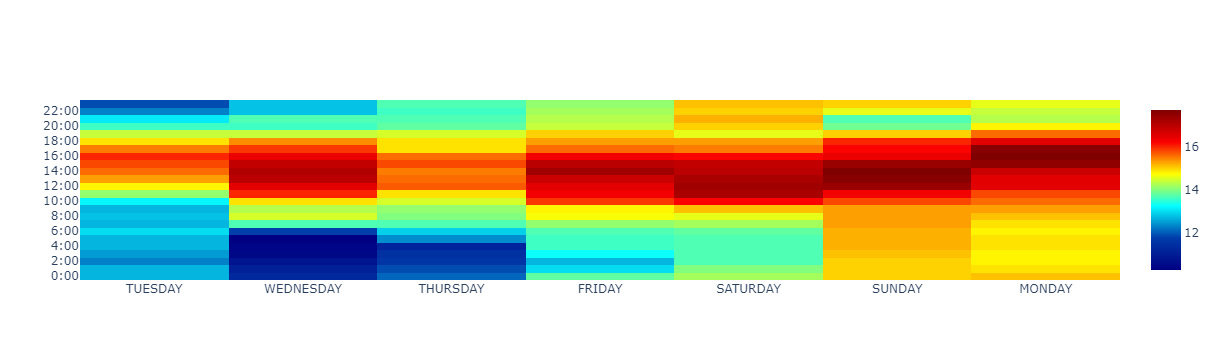

In [50]:
data = [go.Heatmap(x=df1["DAY"], 
                   y=df1["LST_TIME"], 
                   z=df1["T_HR_AVG"],
                  colorscale="jet")]
layout = go.Layout(title="CA Temps", autosize=None,
                   width=600, height=1200, 
                   xaxis=dict(title="day"),
                   yaxis=dict(title="hour"))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(data)

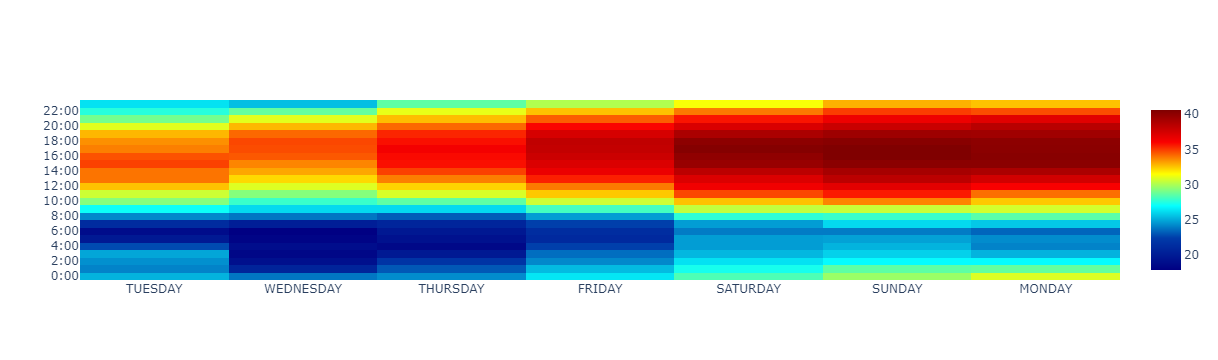

In [51]:
data = [go.Heatmap(x=df2["DAY"], 
                   y=df2["LST_TIME"], 
                   z=df2["T_HR_AVG"],
                  colorscale="jet")]
layout = go.Layout(title="AZ Temps", autosize=None,
                   width=600, height=1200, 
                   xaxis=dict(title="day"),
                   yaxis=dict(title="hour"))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(data)

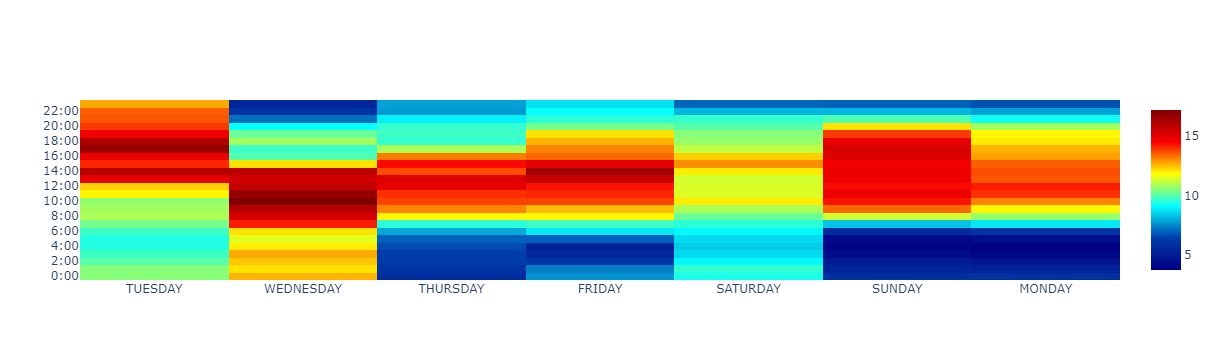

In [52]:
data = [go.Heatmap(x=df3["DAY"], 
                   y=df3["LST_TIME"], 
                   z=df3["T_HR_AVG"],
                  colorscale="jet")]
layout = go.Layout(title="AK Temps", autosize=None,
                   width=600, height=1200, 
                   xaxis=dict(title="day"),
                   yaxis=dict(title="hour"))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(data)

# Heatmap zmin and zmax

Notice that the three Heatmaps all use a different colorscale. We can fix this by using zmin and zmax and assigining these to the same values for each trace:

In [73]:
trace1 = go.Heatmap(x=df1["DAY"], y=df1["LST_TIME"], z=df1["T_HR_AVG"], colorscale="jet", zmin=5, zmax=40)
trace2 = go.Heatmap(x=df2["DAY"], y=df2["LST_TIME"], z=df2["T_HR_AVG"], colorscale="jet", zmin=5, zmax=40)
trace3 = go.Heatmap(x=df3["DAY"], y=df3["LST_TIME"], z=df3["T_HR_AVG"], colorscale="jet", zmin=5, zmax=40)

# Subplots

We can use Subplots to setup a figure with subplots specifying the number of rows and columns (1st order indexing):

In [78]:
fig = subplots.make_subplots(rows=1, cols=3, subplot_titles=["AK", "CA", "AZ"], shared_yaxes=True)

We can use the fig append_trace method to append each trace to the specified row and column (1st order indexing):

In [81]:
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)
fig.append_trace(trace3, row=1, col=3)
fig.update_layout(title="Temp for 3 States");

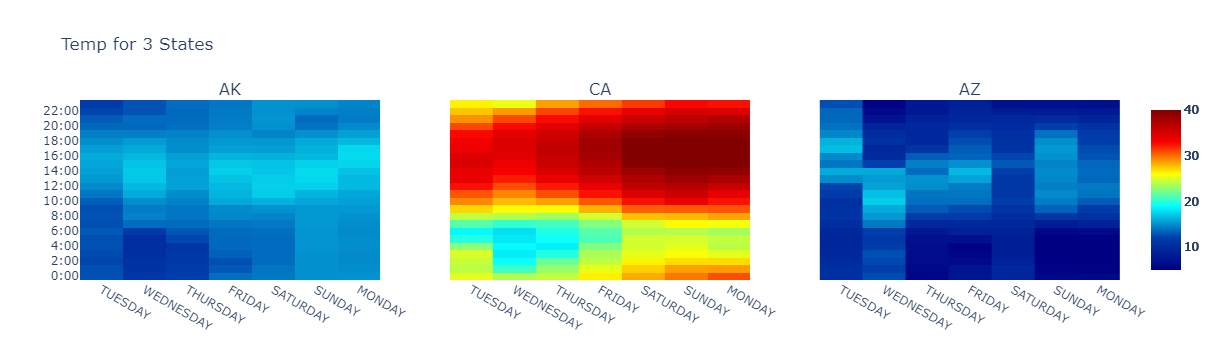

In [82]:
pyo.iplot(fig)